# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import logging

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+f'q={city}&appid={weather_api_key}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                          })

    # If an error is experienced, skip the city
    except Exception as Argument:
        print("City not found. Skipping...")
        logging.exception("Error message:")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | pyapon
Processing Record 3 of Set 1 | puerto deseado
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | leh
Processing Record 7 of Set 1 | kayangel
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | broome
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | isafjordur
Processing Record 14 of Set 1 | zambezi
Processing Record 15 of Set 1 | trinity
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | vorkuta
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | caninde de sao francisco
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | surhuisterveen
Processing Record 22 of Set 1 | lebu
Proces

ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 25 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 26 of Set 1 | west island
Processing Record 27 of Set 1 | ulladulla
Processing Record 28 of Set 1 | bredasdorp
Processing Record 29 of Set 1 | constantia
Processing Record 30 of Set 1 | badger
Processing Record 31 of Set 1 | remire-montjoly
Processing Record 32 of Set 1 | port-aux-francais
Processing Record 33 of Set 1 | iqaluit
Processing Record 34 of Set 1 | sitka
Processing Record 35 of Set 1 | atafu village
Processing Record 36 of Set 1 | linxia chengguanzhen
Processing Record 37 of Set 1 | berdigestyakh
Processing Record 38 of Set 1 | lihue
Processing Record 39 of Set 1 | kone
Processing Record 40 of Set 1 | la palma
Processing Record 41 of Set 1 | la passe
Processing Record 42 of Set 1 | paradip garh
Processing Record 43 of Set 1 | urangan
Processing Record 44 of Set 1 | atyashevo
Processing Record 45 of Set 1 | iskateley
Processing Record 46 of Set 1 | virginia beach
Processing Record 

ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 4 of Set 2 | espargos
City not found. Skipping...
Processing Record 5 of Set 2 | albany
Processing Record 6 of Set 2 | marsh harbour
Processing Record 7 of Set 2 | mugia
Processing Record 8 of Set 2 | bilibino
Processing Record 9 of Set 2 | nagina
Processing Record 10 of Set 2 | zhangye
Processing Record 11 of Set 2 | carnarvon
Processing Record 12 of Set 2 | yellowknife
Processing Record 13 of Set 2 | gorom-gorom
Processing Record 14 of Set 2 | kodiak
Processing Record 15 of Set 2 | nigde
Processing Record 16 of Set 2 | armidale
Processing Record 17 of Set 2 | invercargill
Processing Record 18 of Set 2 | nuuk
Processing Record 19 of Set 2 | naracoorte


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 20 of Set 2 | taiohae
City not found. Skipping...
Processing Record 21 of Set 2 | flying fish cove
Processing Record 22 of Set 2 | awjilah
Processing Record 23 of Set 2 | nemuro
Processing Record 24 of Set 2 | luderitz


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 25 of Set 2 | ytyk-kyuyel'
City not found. Skipping...


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 26 of Set 2 | devinuwara
City not found. Skipping...
Processing Record 27 of Set 2 | enewetak
Processing Record 28 of Set 2 | port elizabeth
Processing Record 29 of Set 2 | san antonio de pale
Processing Record 30 of Set 2 | happy valley-goose bay
Processing Record 31 of Set 2 | selfoss
Processing Record 32 of Set 2 | debre tabor
Processing Record 33 of Set 2 | hanceville
Processing Record 34 of Set 2 | anadyr
Processing Record 35 of Set 2 | lompoc
Processing Record 36 of Set 2 | saipan
Processing Record 37 of Set 2 | wauchope
Processing Record 38 of Set 2 | port mathurin
Processing Record 39 of Set 2 | pacific grove
Processing Record 40 of Set 2 | stanley
Processing Record 41 of Set 2 | susuman
Processing Record 42 of Set 2 | labrador city
Processing Record 43 of Set 2 | mount isa
Processing Record 44 of Set 2 | praia da vitoria
Processing Record 45 of Set 2 | huarmey
Processing Record 46 of Set 2 | barra de santo antonio
Processing Record 47 of Set 2 | el jadid
Proc

ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 5 of Set 3 | asau village
City not found. Skipping...


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 6 of Set 3 | vingt cinq
City not found. Skipping...
Processing Record 7 of Set 3 | ujae
Processing Record 8 of Set 3 | vila franca do campo


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 9 of Set 3 | uaboe
City not found. Skipping...
Processing Record 10 of Set 3 | papatowai
Processing Record 11 of Set 3 | waraseoni
Processing Record 12 of Set 3 | avarua
Processing Record 13 of Set 3 | miandrivazo
Processing Record 14 of Set 3 | guerrero negro
Processing Record 15 of Set 3 | margaret river
Processing Record 16 of Set 3 | nadym
Processing Record 17 of Set 3 | selty
Processing Record 18 of Set 3 | yuzhno-kurilsk
Processing Record 19 of Set 3 | yamada
Processing Record 20 of Set 3 | seorinarayan
Processing Record 21 of Set 3 | mount pearl


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 22 of Set 3 | cable beach
City not found. Skipping...
Processing Record 23 of Set 3 | ancud
Processing Record 24 of Set 3 | georgetown
Processing Record 25 of Set 3 | geraldton


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 26 of Set 3 | toga village
City not found. Skipping...
Processing Record 27 of Set 3 | tongouson
Processing Record 28 of Set 3 | shimoda
Processing Record 29 of Set 3 | canutama
Processing Record 30 of Set 3 | broken hill
Processing Record 31 of Set 3 | tongliao
Processing Record 32 of Set 3 | klyuchi
Processing Record 33 of Set 3 | aasiaat
Processing Record 34 of Set 3 | tazacorte
Processing Record 35 of Set 3 | howard springs
Processing Record 36 of Set 3 | blackwater
Processing Record 37 of Set 3 | yangambi
Processing Record 38 of Set 3 | san patricio
Processing Record 39 of Set 3 | newman
Processing Record 40 of Set 3 | whitehorse
Processing Record 41 of Set 3 | lospalos
Processing Record 42 of Set 3 | wailua homesteads
Processing Record 43 of Set 3 | prince rupert
Processing Record 44 of Set 3 | ushuaia
Processing Record 45 of Set 3 | reggane
Processing Record 46 of Set 3 | khandyga
Processing Record 47 of Set 3 | new norfolk
Processing Record 48 of Set 3 | dudin

ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 23 of Set 4 | gallivare
City not found. Skipping...
Processing Record 24 of Set 4 | nikolayevsk-on-amure
Processing Record 25 of Set 4 | huanren
Processing Record 26 of Set 4 | jamestown
Processing Record 27 of Set 4 | byumba
Processing Record 28 of Set 4 | laascaanood
Processing Record 29 of Set 4 | oranjemund
Processing Record 30 of Set 4 | burutu
Processing Record 31 of Set 4 | haikou
Processing Record 32 of Set 4 | n'zeto
Processing Record 33 of Set 4 | mahanoro
Processing Record 34 of Set 4 | sinaia
Processing Record 35 of Set 4 | masterton
Processing Record 36 of Set 4 | egilsstadir
Processing Record 37 of Set 4 | polyarnyy


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 38 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 39 of Set 4 | cockburn town
Processing Record 40 of Set 4 | st. john's
Processing Record 41 of Set 4 | kavieng
Processing Record 42 of Set 4 | hawaiian paradise park
Processing Record 43 of Set 4 | zaozersk
Processing Record 44 of Set 4 | lethbridge
Processing Record 45 of Set 4 | sumbawanga
Processing Record 46 of Set 4 | greifswald
Processing Record 47 of Set 4 | olinda
Processing Record 48 of Set 4 | choyr
Processing Record 49 of Set 4 | akureyri
Processing Record 0 of Set 5 | carlisle
Processing Record 1 of Set 5 | suya
Processing Record 2 of Set 5 | impfondo
Processing Record 3 of Set 5 | minas de marcona
Processing Record 4 of Set 5 | warrenton
Processing Record 5 of Set 5 | dukhovnitskoye
Processing Record 6 of Set 5 | al ghayzah
Processing Record 7 of Set 5 | ciudad lazaro cardenas


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 8 of Set 5 | koneurgench
City not found. Skipping...
Processing Record 9 of Set 5 | coahuayana de hidalgo
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | prado
Processing Record 12 of Set 5 | port alfred
Processing Record 13 of Set 5 | gushu
Processing Record 14 of Set 5 | ditrau
Processing Record 15 of Set 5 | lubang
Processing Record 16 of Set 5 | paraiso
Processing Record 17 of Set 5 | guaiba
Processing Record 18 of Set 5 | cradock
Processing Record 19 of Set 5 | vilyuchinsk
Processing Record 20 of Set 5 | arraial do cabo
Processing Record 21 of Set 5 | talnakh
Processing Record 22 of Set 5 | natal


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 23 of Set 5 | seogwipo
City not found. Skipping...
Processing Record 24 of Set 5 | brigantine


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 25 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 26 of Set 5 | usogorsk
Processing Record 27 of Set 5 | queenstown
Processing Record 28 of Set 5 | richards bay
Processing Record 29 of Set 5 | kismayo
Processing Record 30 of Set 5 | rikaze
Processing Record 31 of Set 5 | tura


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 32 of Set 5 | novokazalinsk
City not found. Skipping...
Processing Record 33 of Set 5 | howrah
Processing Record 34 of Set 5 | bodo
Processing Record 35 of Set 5 | qamdo
Processing Record 36 of Set 5 | afaahiti
Processing Record 37 of Set 5 | konstantinovka
Processing Record 38 of Set 5 | benjamin aceval
Processing Record 39 of Set 5 | great bend
Processing Record 40 of Set 5 | kalmunai
Processing Record 41 of Set 5 | nova sintra
Processing Record 42 of Set 5 | bandarbeyla
Processing Record 43 of Set 5 | balnearia
Processing Record 44 of Set 5 | al artawiyah
Processing Record 45 of Set 5 | sidi merouane
Processing Record 46 of Set 5 | yucca valley
Processing Record 47 of Set 5 | motygino
Processing Record 48 of Set 5 | i-n-salah
Processing Record 49 of Set 5 | alice springs
Processing Record 0 of Set 6 | brisas de zicatela
Processing Record 1 of Set 6 | fort mcmurray
Processing Record 2 of Set 6 | vorgashor
Processing Record 3 of Set 6 | ibimirim
Processing Record 4 o

ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 43 of Set 7 | saratamata
City not found. Skipping...
Processing Record 44 of Set 7 | bashmakovo
Processing Record 45 of Set 7 | kerikeri
Processing Record 46 of Set 7 | gadzhiyevo
Processing Record 47 of Set 7 | urzhar
Processing Record 48 of Set 7 | alice
Processing Record 49 of Set 7 | port moresby
Processing Record 0 of Set 8 | mukalla
Processing Record 1 of Set 8 | west end
Processing Record 2 of Set 8 | veraval
Processing Record 3 of Set 8 | slave lake
Processing Record 4 of Set 8 | pathein
Processing Record 5 of Set 8 | hamilton


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 6 of Set 8 | pariang
City not found. Skipping...
Processing Record 7 of Set 8 | sao jose da coroa grande
Processing Record 8 of Set 8 | guarapari
Processing Record 9 of Set 8 | ikwiriri
Processing Record 10 of Set 8 | las tablas
Processing Record 11 of Set 8 | tuy hoa
Processing Record 12 of Set 8 | mirny
Processing Record 13 of Set 8 | mantua
Processing Record 14 of Set 8 | tarawa
Processing Record 15 of Set 8 | tazovsky
Processing Record 16 of Set 8 | mulayjah
Processing Record 17 of Set 8 | villa bruzual
Processing Record 18 of Set 8 | chibougamau
Processing Record 19 of Set 8 | zholymbet
Processing Record 20 of Set 8 | tchintabaraden
Processing Record 21 of Set 8 | mil'kovo
Processing Record 22 of Set 8 | basco
Processing Record 23 of Set 8 | arkhangel'sk
Processing Record 24 of Set 8 | iringa
Processing Record 25 of Set 8 | suhbaatar
Processing Record 26 of Set 8 | nagqu
Processing Record 27 of Set 8 | niafunke
Processing Record 28 of Set 8 | mundybash
Processing

ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 35 of Set 8 | shangri-la
City not found. Skipping...
Processing Record 36 of Set 8 | fale old settlement
Processing Record 37 of Set 8 | la asuncion
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | floro
Processing Record 40 of Set 8 | hede
Processing Record 41 of Set 8 | sarikei
Processing Record 42 of Set 8 | haiku-pauwela
Processing Record 43 of Set 8 | serhiyivka
Processing Record 44 of Set 8 | samfya
Processing Record 45 of Set 8 | tanumah
Processing Record 46 of Set 8 | rizhao
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | caleta de carquin
Processing Record 49 of Set 8 | macheng
Processing Record 0 of Set 9 | kapit
Processing Record 1 of Set 9 | san pedro pochutla
Processing Record 2 of Set 9 | qarauyl
Processing Record 3 of Set 9 | lorengau
Processing Record 4 of Set 9 | lancut
Processing Record 5 of Set 9 | saint-pierre
Processing Record 6 of Set 9 | hargeysa
Processing Record 7 of Set 9 | college
Processing Record

ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 19 of Set 9 | marudi
City not found. Skipping...
Processing Record 20 of Set 9 | cruz del eje
Processing Record 21 of Set 9 | jayapura
Processing Record 22 of Set 9 | talara


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 23 of Set 9 | hayma'
City not found. Skipping...
Processing Record 24 of Set 9 | ohara
Processing Record 25 of Set 9 | alenquer
Processing Record 26 of Set 9 | alesund
Processing Record 27 of Set 9 | northam
Processing Record 28 of Set 9 | inhambane
Processing Record 29 of Set 9 | illizi
Processing Record 30 of Set 9 | waingapu
Processing Record 31 of Set 9 | tralee
Processing Record 32 of Set 9 | westport
Processing Record 33 of Set 9 | bengkulu
Processing Record 34 of Set 9 | la ronge
Processing Record 35 of Set 9 | tafresh
Processing Record 36 of Set 9 | keflavik
Processing Record 37 of Set 9 | cambria
Processing Record 38 of Set 9 | zeya
Processing Record 39 of Set 9 | sanya
Processing Record 40 of Set 9 | cove
Processing Record 41 of Set 9 | sai buri


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 42 of Set 9 | tranovaho
City not found. Skipping...
Processing Record 43 of Set 9 | aljezur
Processing Record 44 of Set 9 | copala
Processing Record 45 of Set 9 | ash shafa
Processing Record 46 of Set 9 | ifanadiana
Processing Record 47 of Set 9 | portland
Processing Record 48 of Set 9 | mhamid
Processing Record 49 of Set 9 | rongelap
Processing Record 0 of Set 10 | vernon
Processing Record 1 of Set 10 | almeirim
Processing Record 2 of Set 10 | smithers
Processing Record 3 of Set 10 | nadi


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 4 of Set 10 | tobi village
City not found. Skipping...
Processing Record 5 of Set 10 | eastham
Processing Record 6 of Set 10 | ovalle
Processing Record 7 of Set 10 | jefferson city
Processing Record 8 of Set 10 | kollo
Processing Record 9 of Set 10 | forio
Processing Record 10 of Set 10 | turpan
Processing Record 11 of Set 10 | pagar alam
Processing Record 12 of Set 10 | belyy yar
Processing Record 13 of Set 10 | tidjikja
Processing Record 14 of Set 10 | port macquarie
Processing Record 15 of Set 10 | port douglas
Processing Record 16 of Set 10 | corner brook
Processing Record 17 of Set 10 | taos
Processing Record 18 of Set 10 | mary
Processing Record 19 of Set 10 | az zawr
Processing Record 20 of Set 10 | malpica
Processing Record 21 of Set 10 | uglegorsk
Processing Record 22 of Set 10 | warri
Processing Record 23 of Set 10 | demidov
Processing Record 24 of Set 10 | sa'dah
Processing Record 25 of Set 10 | kuantan
Processing Record 26 of Set 10 | cholet
Processing Rec

ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 25 of Set 11 | kazalinsk
City not found. Skipping...
Processing Record 26 of Set 11 | ciudad del este


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


Processing Record 27 of Set 11 | shofirkon shahri
City not found. Skipping...
Processing Record 28 of Set 11 | bardai
Processing Record 29 of Set 11 | xiva
Processing Record 30 of Set 11 | xai-xai
Processing Record 31 of Set 11 | gisborne
Processing Record 32 of Set 11 | santa vitoria do palmar
Processing Record 33 of Set 11 | laojunmiao
Processing Record 34 of Set 11 | kerimaki
Processing Record 35 of Set 11 | trevelin
Processing Record 36 of Set 11 | moyynkum
Processing Record 37 of Set 11 | nisia floresta
Processing Record 38 of Set 11 | kavaratti
Processing Record 39 of Set 11 | santo antonio do ica
Processing Record 40 of Set 11 | iwanai
Processing Record 41 of Set 11 | sinop
Processing Record 42 of Set 11 | arias
Processing Record 43 of Set 11 | cartagena del chaira
Processing Record 44 of Set 11 | moose jaw
Processing Record 45 of Set 11 | kapuskasing
Processing Record 46 of Set 11 | ahau


ERROR:root:Error message:
Traceback (most recent call last):
  File "C:\Users\Moburu\AppData\Local\Temp\ipykernel_27200\2780827969.py", line 38, in <module>
    city_lat = city_weather['coord']['lat']
               ~~~~~~~~~~~~^^^^^^^^^
KeyError: 'coord'


City not found. Skipping...
Processing Record 47 of Set 11 | dakhla
Processing Record 48 of Set 11 | huizhou
Processing Record 49 of Set 11 | north bend
Processing Record 0 of Set 12 | tokar
Processing Record 1 of Set 12 | canandaigua
Processing Record 2 of Set 12 | princeville
Processing Record 3 of Set 12 | caldwell
Processing Record 4 of Set 12 | lamu
Processing Record 5 of Set 12 | perols
Processing Record 6 of Set 12 | fecamp
Processing Record 7 of Set 12 | panamaram
Processing Record 8 of Set 12 | schrozberg
Processing Record 9 of Set 12 | pudasjarvi
Processing Record 10 of Set 12 | greymouth
Processing Record 11 of Set 12 | augusto correa
Processing Record 12 of Set 12 | rio preto da eva
Processing Record 13 of Set 12 | itoman
Processing Record 14 of Set 12 | firmat
Processing Record 15 of Set 12 | quellon
Processing Record 16 of Set 12 | antalaha
Processing Record 17 of Set 12 | konarka
Processing Record 18 of Set 12 | villanueva
Processing Record 19 of Set 12 | dusti
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,274.21,86,75,4.63,CL,Mon Jul 29 00:16:53 2024
1,pyapon,16.2833,95.6833,299.72,87,100,1.22,MM,Mon Jul 29 00:16:54 2024
2,puerto deseado,-47.7503,-65.8938,275.11,68,26,6.25,AR,Mon Jul 29 00:16:55 2024
3,hithadhoo,-0.6000,73.0833,302.09,71,100,4.57,MV,Mon Jul 29 00:16:56 2024
4,grytviken,-54.2811,-36.5092,271.99,81,62,4.78,GS,Mon Jul 29 00:08:28 2024


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,274.21,86,75,4.63,CL,Mon Jul 29 00:16:53 2024
1,pyapon,16.2833,95.6833,299.72,87,100,1.22,MM,Mon Jul 29 00:16:54 2024
2,puerto deseado,-47.7503,-65.8938,275.11,68,26,6.25,AR,Mon Jul 29 00:16:55 2024
3,hithadhoo,-0.6000,73.0833,302.09,71,100,4.57,MV,Mon Jul 29 00:16:56 2024
4,grytviken,-54.2811,-36.5092,271.99,81,62,4.78,GS,Mon Jul 29 00:08:28 2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

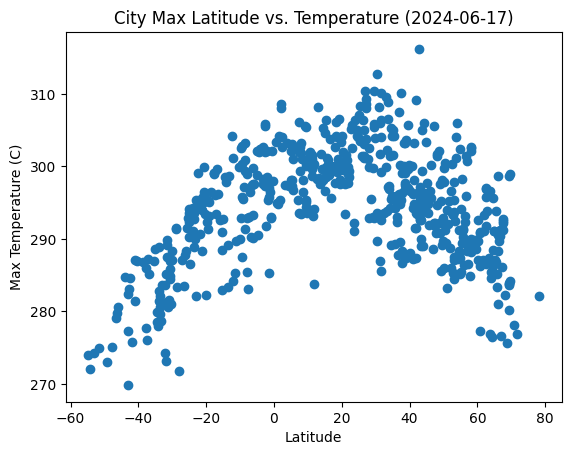

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

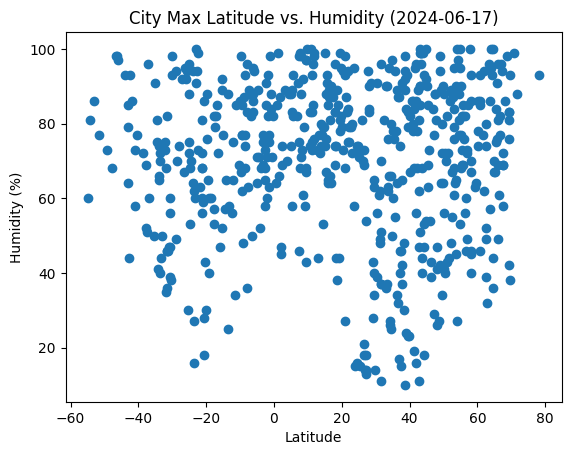

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

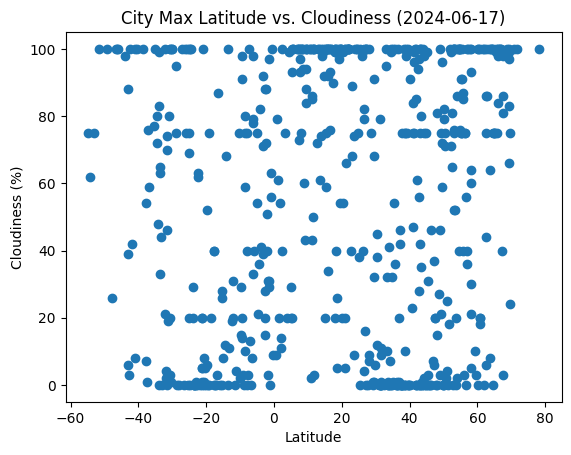

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Cloudiness (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

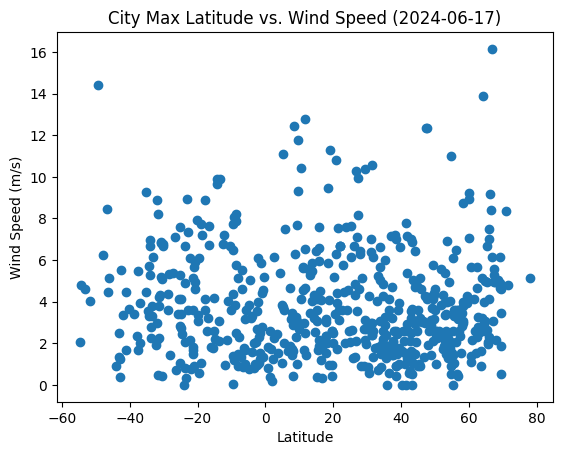

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Wind Speed (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def regress(x, y):
    slope, intercept, r, p, std_err = linregress(x, y)
    print(f'The R^2 value is: {r}')
    plt.scatter(x, y)
    fit = slope * x + intercept
    plt.plot(x, fit, 'red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
df_north = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
df_north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pyapon,16.2833,95.6833,299.72,87,100,1.22,MM,Mon Jul 29 00:16:54 2024
5,leh,34.1667,77.5833,294.23,26,7,0.85,IN,Mon Jul 29 00:16:58 2024
6,kayangel,8.0823,134.7173,301.84,71,75,2.86,PW,Mon Jul 29 00:16:59 2024
8,bethel,41.3712,-73.4140,294.82,84,75,0.00,US,Mon Jul 29 00:13:39 2024
9,broome,42.2506,-75.8330,293.40,78,61,0.58,US,Mon Jul 29 00:17:02 2024


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
df_south = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
df_south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,274.21,86,75,4.63,CL,Mon Jul 29 00:16:53 2024
2,puerto deseado,-47.7503,-65.8938,275.11,68,26,6.25,AR,Mon Jul 29 00:16:55 2024
3,hithadhoo,-0.6000,73.0833,302.09,71,100,4.57,MV,Mon Jul 29 00:16:56 2024
4,grytviken,-54.2811,-36.5092,271.99,81,62,4.78,GS,Mon Jul 29 00:08:28 2024
7,adamstown,-25.0660,-130.1015,294.18,75,100,5.27,PN,Mon Jul 29 00:08:34 2024


###  Temperature vs. Latitude Linear Regression Plot

The R^2 value is: -0.5821708571558402


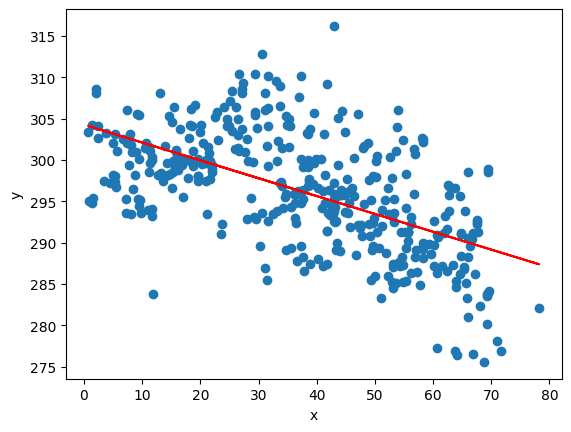

In [27]:
# Linear regression on Northern Hemisphere
regress(df_north['Lat'], df_north['Max Temp'])

The R^2 value is: 0.7729933730639933


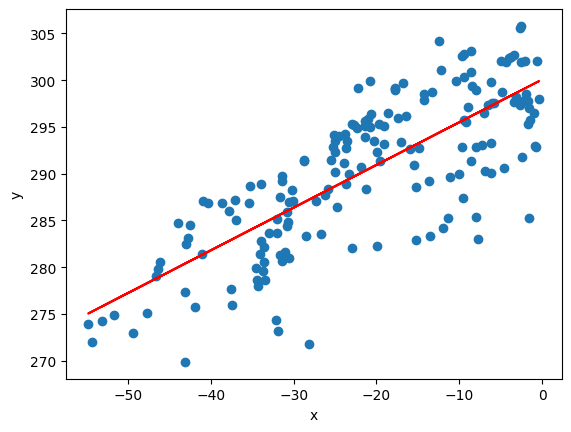

In [26]:
# Linear regression on Southern Hemisphere
regress(df_south['Lat'], df_south['Max Temp'])

**Discussion about the linear relationship:** There is a linear relationship, the south more tightly coupled than the north.

### Humidity vs. Latitude Linear Regression Plot

The R^2 value is: -0.0357979910436256


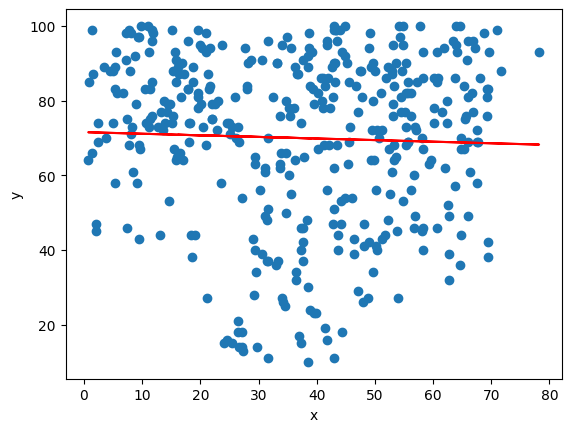

In [28]:
# Northern Hemisphere
regress(df_north['Lat'], df_north['Humidity'])

The R^2 value is: 0.08405038206333851


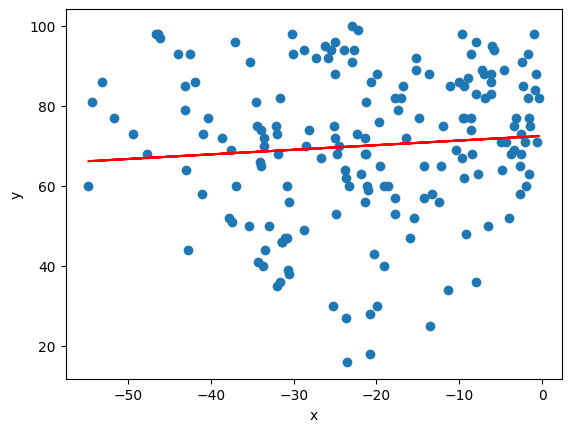

In [29]:
# Southern Hemisphere
regress(df_south['Lat'], df_south['Humidity'])

**Discussion about the linear relationship:** There does not seem to be a linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The R^2 value is: -0.05846745502448227


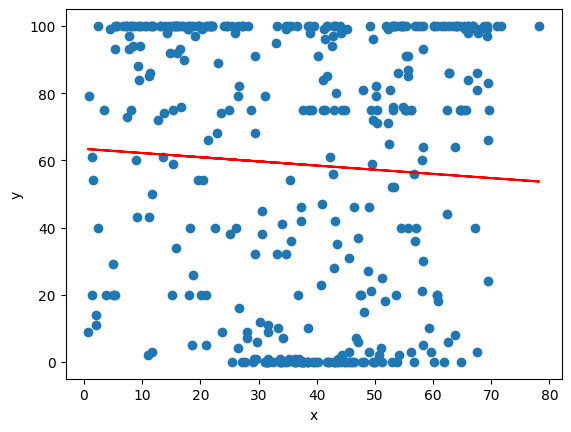

In [30]:
# Northern Hemisphere
regress(df_north['Lat'], df_north['Cloudiness'])

The R^2 value is: -0.19911894567977706


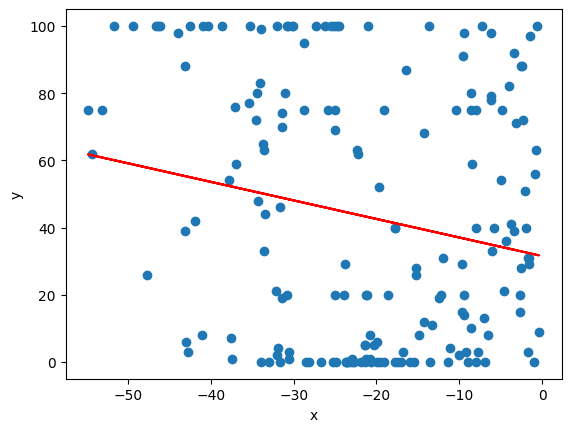

In [31]:
# Southern Hemisphere
regress(df_south['Lat'], df_south['Cloudiness'])

**Discussion about the linear relationship:** There does not seem to be a linear relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The R^2 value is: -0.001770565509291817


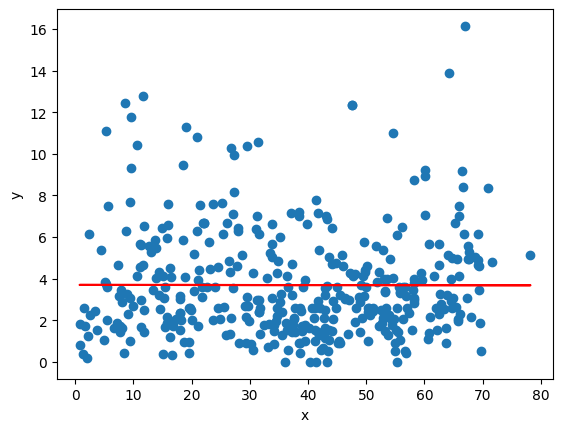

In [32]:
# Northern Hemisphere
regress(df_north['Lat'], df_north['Wind Speed'])

The R^2 value is: -0.14953442366964653


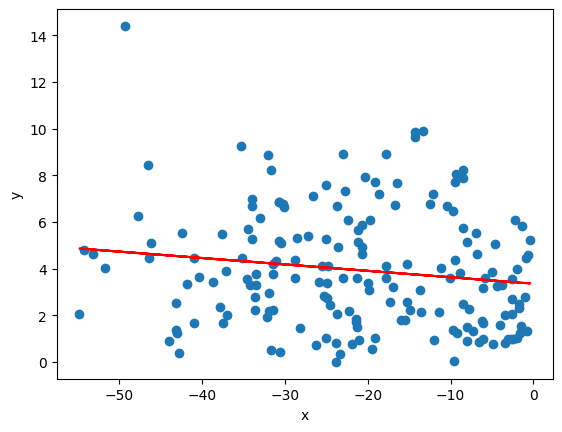

In [33]:
# Southern Hemisphere
regress(df_south['Lat'], df_south['Wind Speed'])

**Discussion about the linear relationship:** There does not appear to be a linear relationship.